<a href="https://colab.research.google.com/github/abbasmirza18/ml-internship/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer churn (or customer attrition) refers to the loss of customers or subscribers for any reason at all. **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading a dataset


In [15]:
ds=pd.read_csv("/content/Bank Customer Churn Prediction.csv")

to read/see 1st 5 rows of a dataset we use head()

In [3]:
ds.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


to read/see last 5 rows of dataset we use tail()

In [4]:
ds.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


to get more details aboubt dataset we use info()

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


to get statistical summary we can use desccribe()

In [6]:
ds.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


we can remove unwanted data using drop

In [17]:
ds=ds.drop(columns=['customer_id'])

In [18]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


we need to covert object data types into binary since machine deals with numbers only . to see unique values

In [21]:

ds['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
ds['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

one hot encoding is a popular technique used in ML to convert /represent categorical variables as binary vectors

In [23]:
ds=pd.get_dummies(data=ds,drop_first=True)

plotting active members in the bank

<Axes: ylabel='Frequency'>

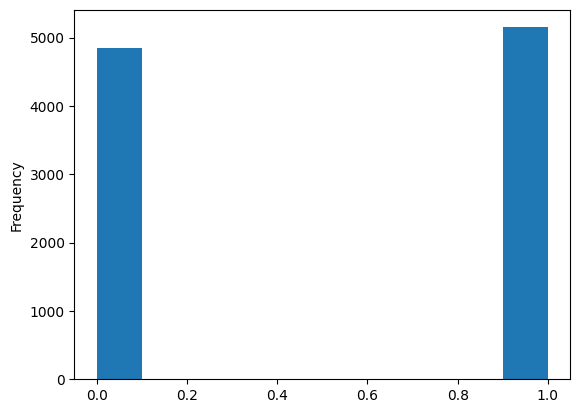

In [26]:
ds.active_member.plot.hist()

In [27]:
(ds.active_member==0).sum()

4849

not active


In [28]:
(ds.active_member==1).sum()

5151

generating corelation matrix/heatmap


In [29]:
ds_2=ds.drop(columns='active_member')

<Axes: title={'center': 'correlated with active member'}>

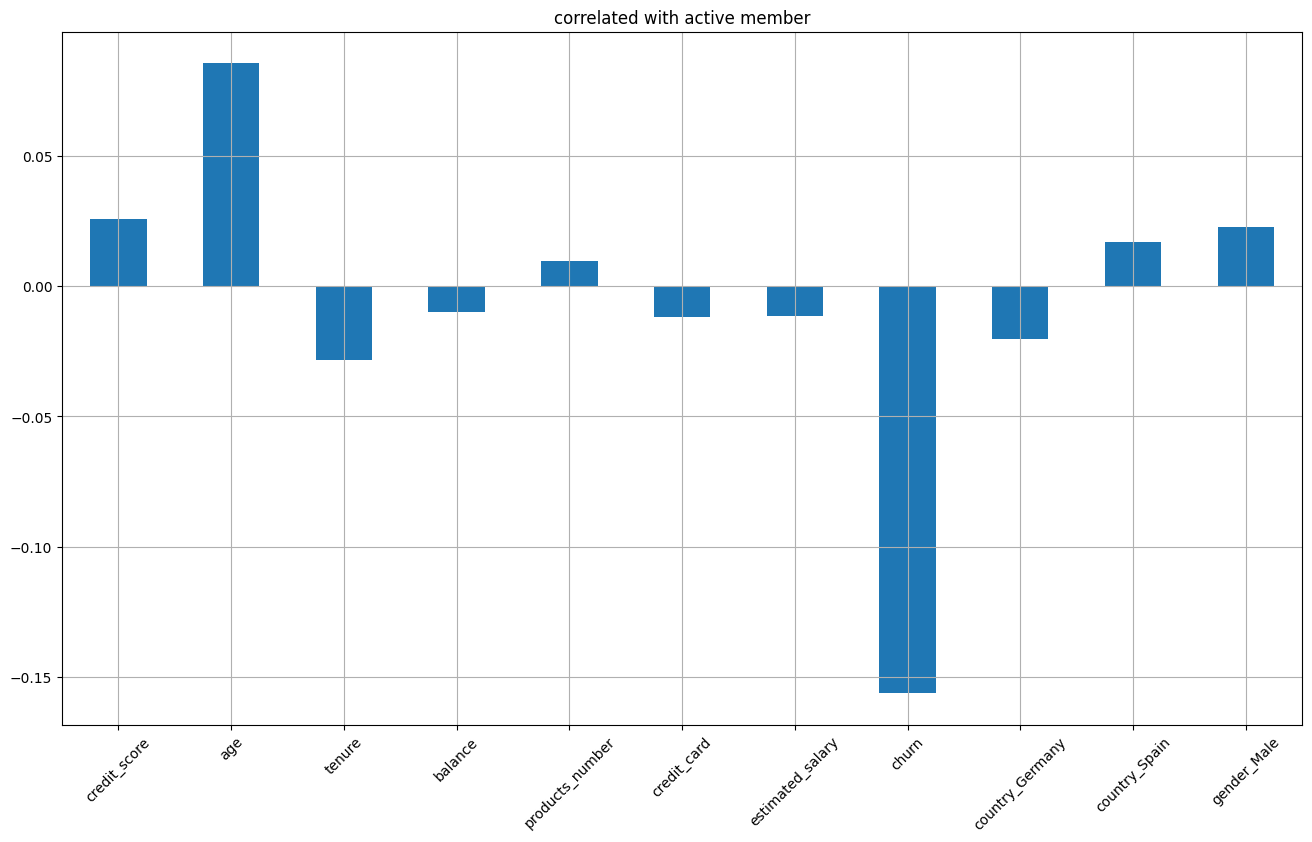

In [30]:
ds_2.corrwith(ds['active_member']).plot.bar(figsize=(16,9),title='correlated with active member',rot=45,grid=True)

In [31]:
corr=ds.corr() #heatmap

<Axes: >

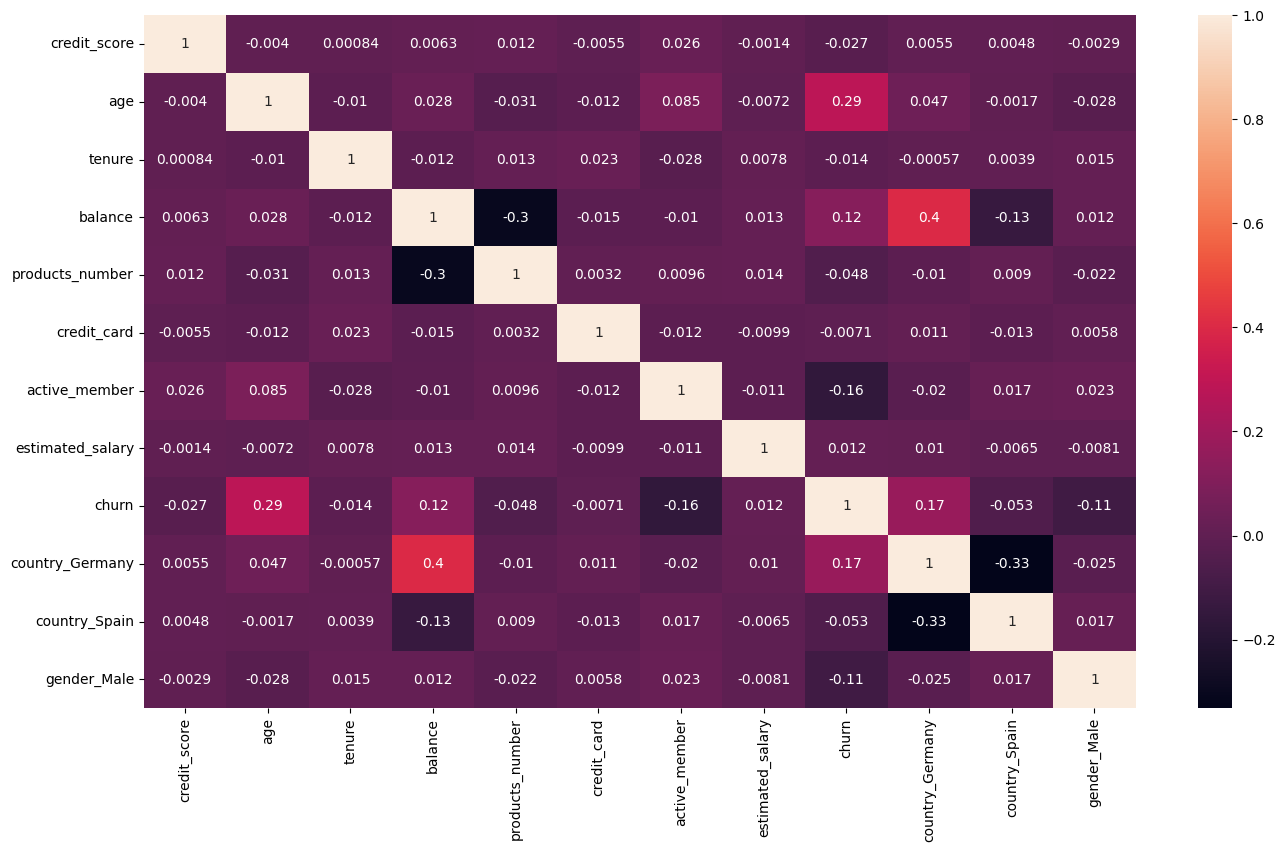

In [32]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

ds.nunique()  #Gives the no of unique elements

In [33]:
ds.nunique()

credit_score         460
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
country_Germany        2
country_Spain          2
gender_Male            2
dtype: int64

ds.isnull().sum() This command gives the no of missing elements

In [34]:
ds.isnull().sum()

credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
country_Germany     0
country_Spain       0
gender_Male         0
dtype: int64

(ds.isnull().sum()/(len(data)))*100 This command gives the percentage of the missing elements

In [36]:
(ds.isnull().sum()/(len(ds)))*100

credit_score        0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
country_Germany     0.0
country_Spain       0.0
gender_Male         0.0
dtype: float64

ds2 = ds.drop(['credit_score','products_number'],axis=1)
This command removes credit score and product number from the original data set because they are not necessary for the calculation of the churn. we need to know whether they are active member or not


In [37]:
ds2 = ds.drop(['credit_score','products_number'],axis=1)

In [39]:
import pandas as pd
df = ds2
df['churn'] = 1
df.loc[df['active_member'] == 1, 'churn'] = 0
print(df.head()) #by applying the logic we can get the churn value and after that we are displaying the data set

   age  tenure    balance  credit_card  active_member  estimated_salary  \
0   42       2       0.00            1              1         101348.88   
1   41       1   83807.86            0              1         112542.58   
2   42       8  159660.80            1              0         113931.57   
3   39       1       0.00            0              0          93826.63   
4   43       2  125510.82            1              1          79084.10   

   churn  country_Germany  country_Spain  gender_Male  
0      0                0              0            0  
1      0                0              1            0  
2      1                0              0            0  
3      1                0              0            0  
4      0                0              1            0  


In [40]:
df

,age,tenure,balance,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,42,2,0.00,1,1,101348.88,0,0,0,0
1,41,1,83807.86,0,1,112542.58,0,0,1,0
2,42,8,159660.80,1,0,113931.57,1,0,0,0
3,39,1,0.00,0,0,93826.63,1,0,0,0
4,43,2,125510.82,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,1,0,96270.64,1,0,0,1
9996,35,10,57369.61,1,1,101699.77,0,0,0,1
9997,36,7,0.00,0,1,42085.58,0,0,0,0
9998,42,3,75075.31,1,0,92888.52,1,1,0,1


from matplotlib import pyplot as plt
ds2['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ds2['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ds2['balance'].plot(kind='hist', bins=20, title='balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ds2['credit_card'].plot(kind='hist', bins=20, title='credit_card')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ds2.plot(kind='scatter', x='age', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ds2.plot(kind='scatter', x='tenure', y='balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ds2.plot(kind='scatter', x='balance', y='credit_card', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ds2.plot(kind='scatter', x='credit_card', y='active_member', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ds2['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ds2['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ds2['balance'].plot(kind='line', figsize=(8, 4), title='balance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ds2['credit_card'].plot(kind='line', figsize=(8, 4), title='credit_card')
plt.gca().spines[['top', 'right']].set_visible(False)

In [41]:
ds2.describe().T #Gives the statistical distributions

,count,mean,std,min,25%,50%,75%,max
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
credit_card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
active_member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
churn,10000.0,0.484900,0.499797,0.00,0.00,0.000,1.0000,1.00
country_Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00
country_Spain,10000.0,0.247700,0.431698,0.00,0.00,0.000,0.0000,1.00
gender_Male,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

ds2.describe(include='all').This commands provides the statistics summary of all data, include object, category etc

In [42]:
ds2.describe(include='all')

,age,tenure,balance,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,5.012800,76485.889288,0.70550,0.515100,100090.239881,0.484900,0.250900,0.247700,0.545700
std,10.487806,2.892174,62397.405202,0.45584,0.499797,57510.492818,0.499797,0.433553,0.431698,0.497932
min,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,1.000000
max,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [44]:
import numpy as np
cat_cols=ds2.select_dtypes(include=['object']).columns
num_cols = ds2.select_dtypes(include=np.number).columns.tolist()     #Catagorize the Variables i.e Categorial Variables and Numerical Variables
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols) #This command categorises the variables into category variables and numerical variables

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['age', 'tenure', 'balance', 'credit_card', 'active_member', 'estimated_salary', 'churn', 'country_Germany', 'country_Spain', 'gender_Male']


This command categorises the variables into category variables and numerical variables

age
Skew : 1.01


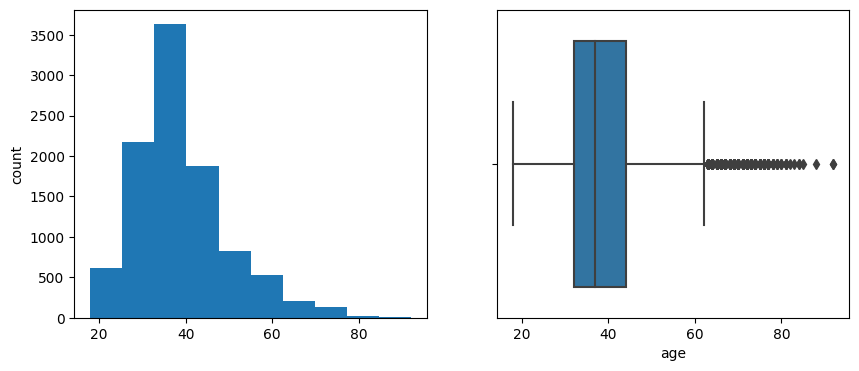

tenure
Skew : 0.01


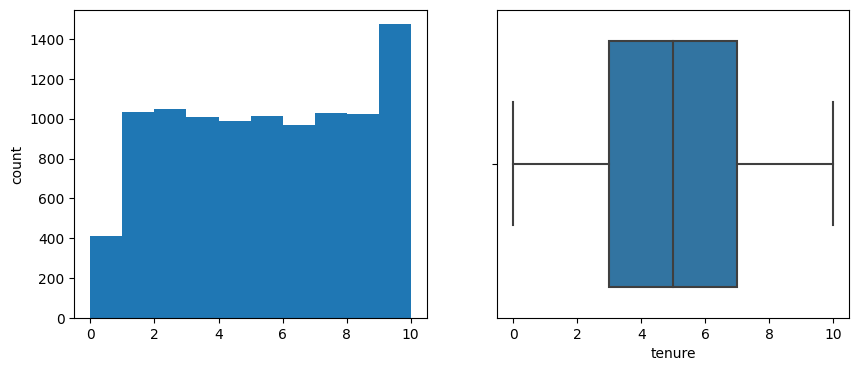

balance
Skew : -0.14


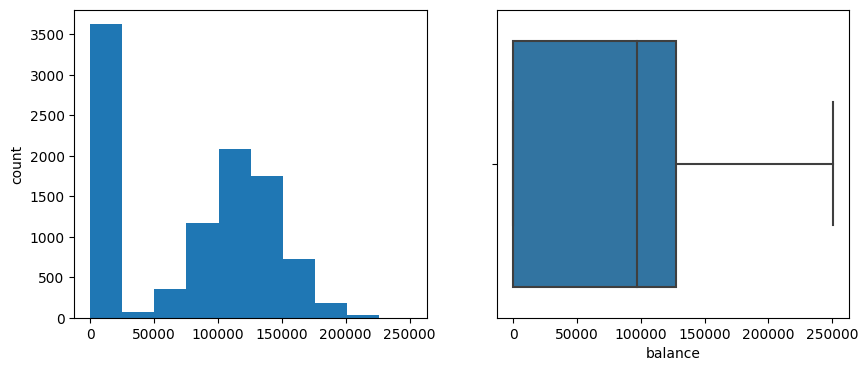

credit_card
Skew : -0.9


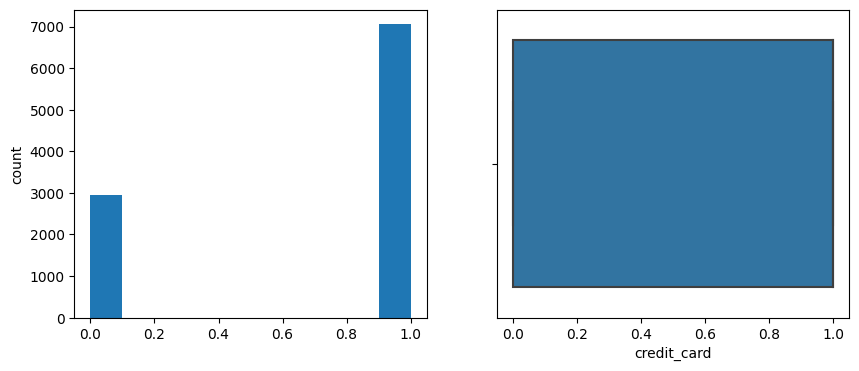

active_member
Skew : -0.06


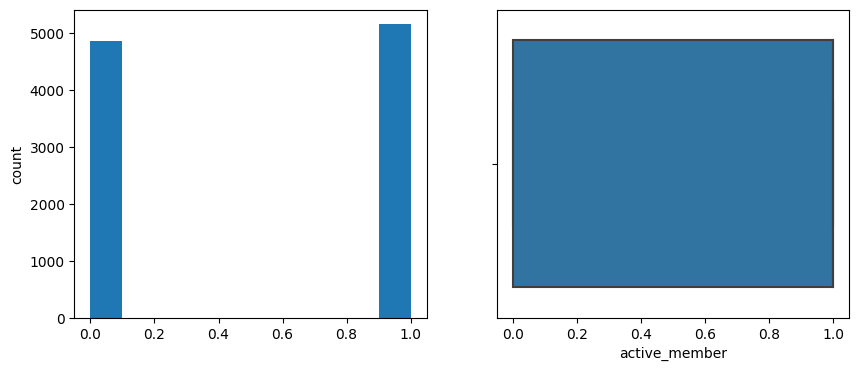

estimated_salary
Skew : 0.0


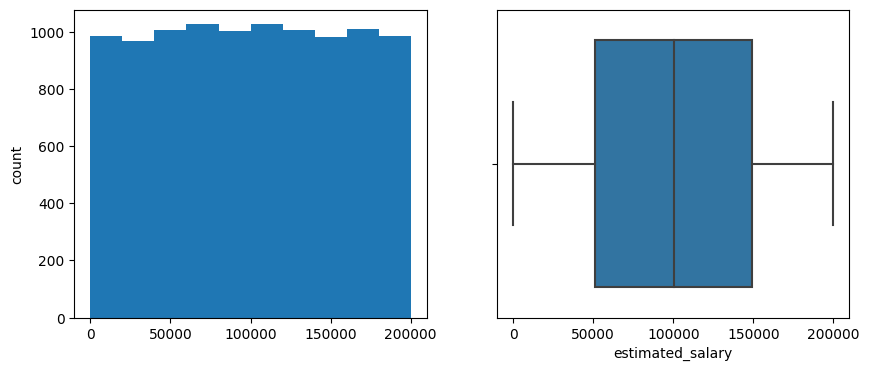

churn
Skew : 1.47


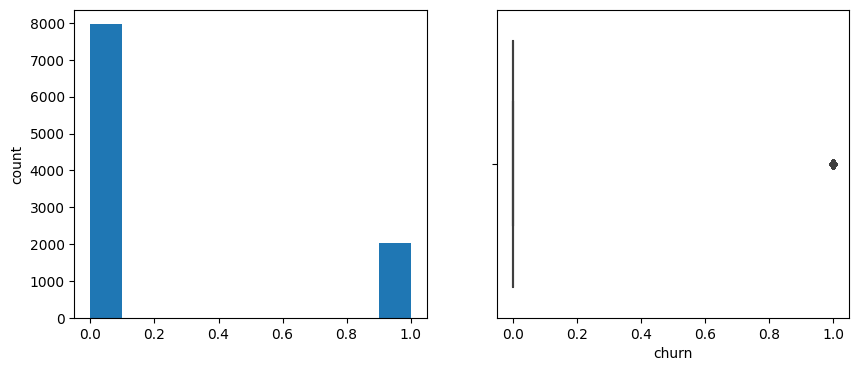

country_Germany
Skew : 1.15


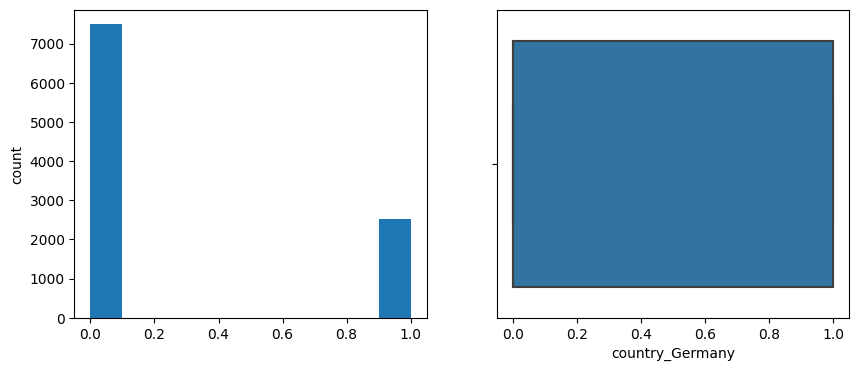

country_Spain
Skew : 1.17


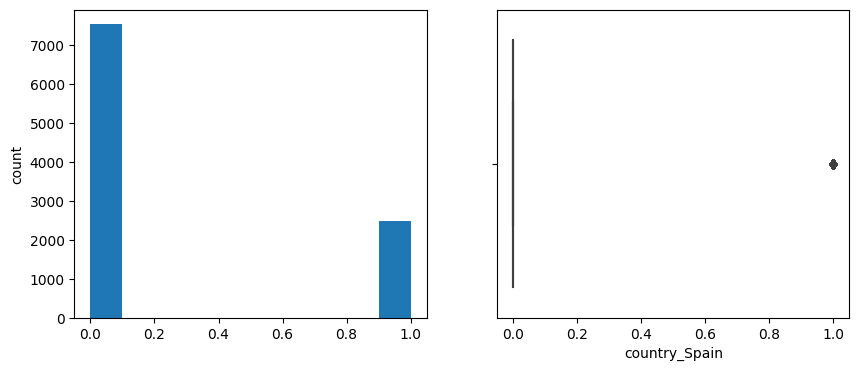

gender_Male
Skew : -0.18


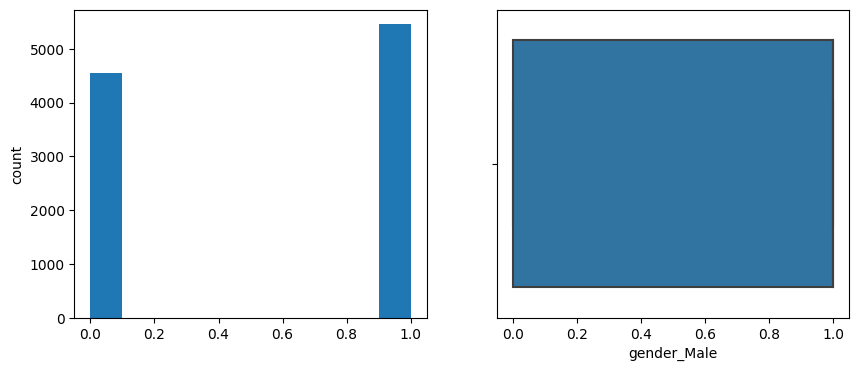

In [46]:
for col in num_cols:
    print(col)
    print('Skew :', round(ds[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)                                        #plotting using the histogram and box plot
    ds[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=ds[col])
    plt.show()

Plotting the graph using histogram and box plot

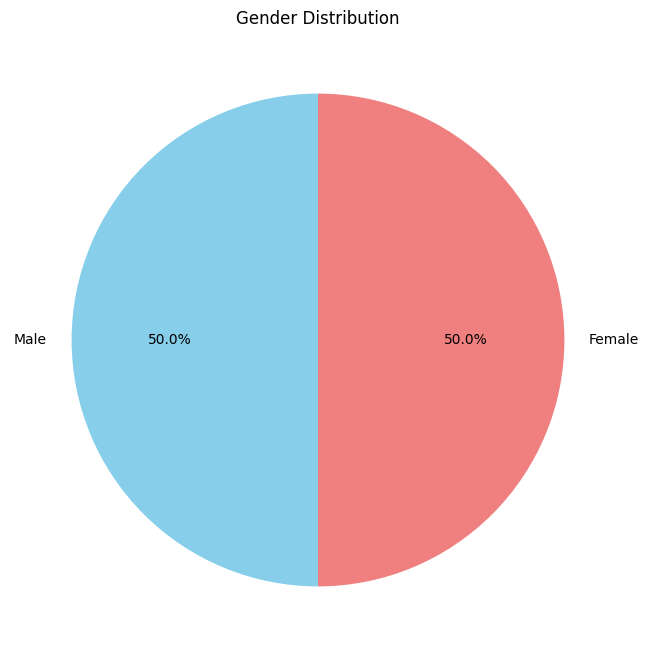

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
df['gender'] = ['Male', 'Female'] * 5000
gender_distribution = df['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

bar plot


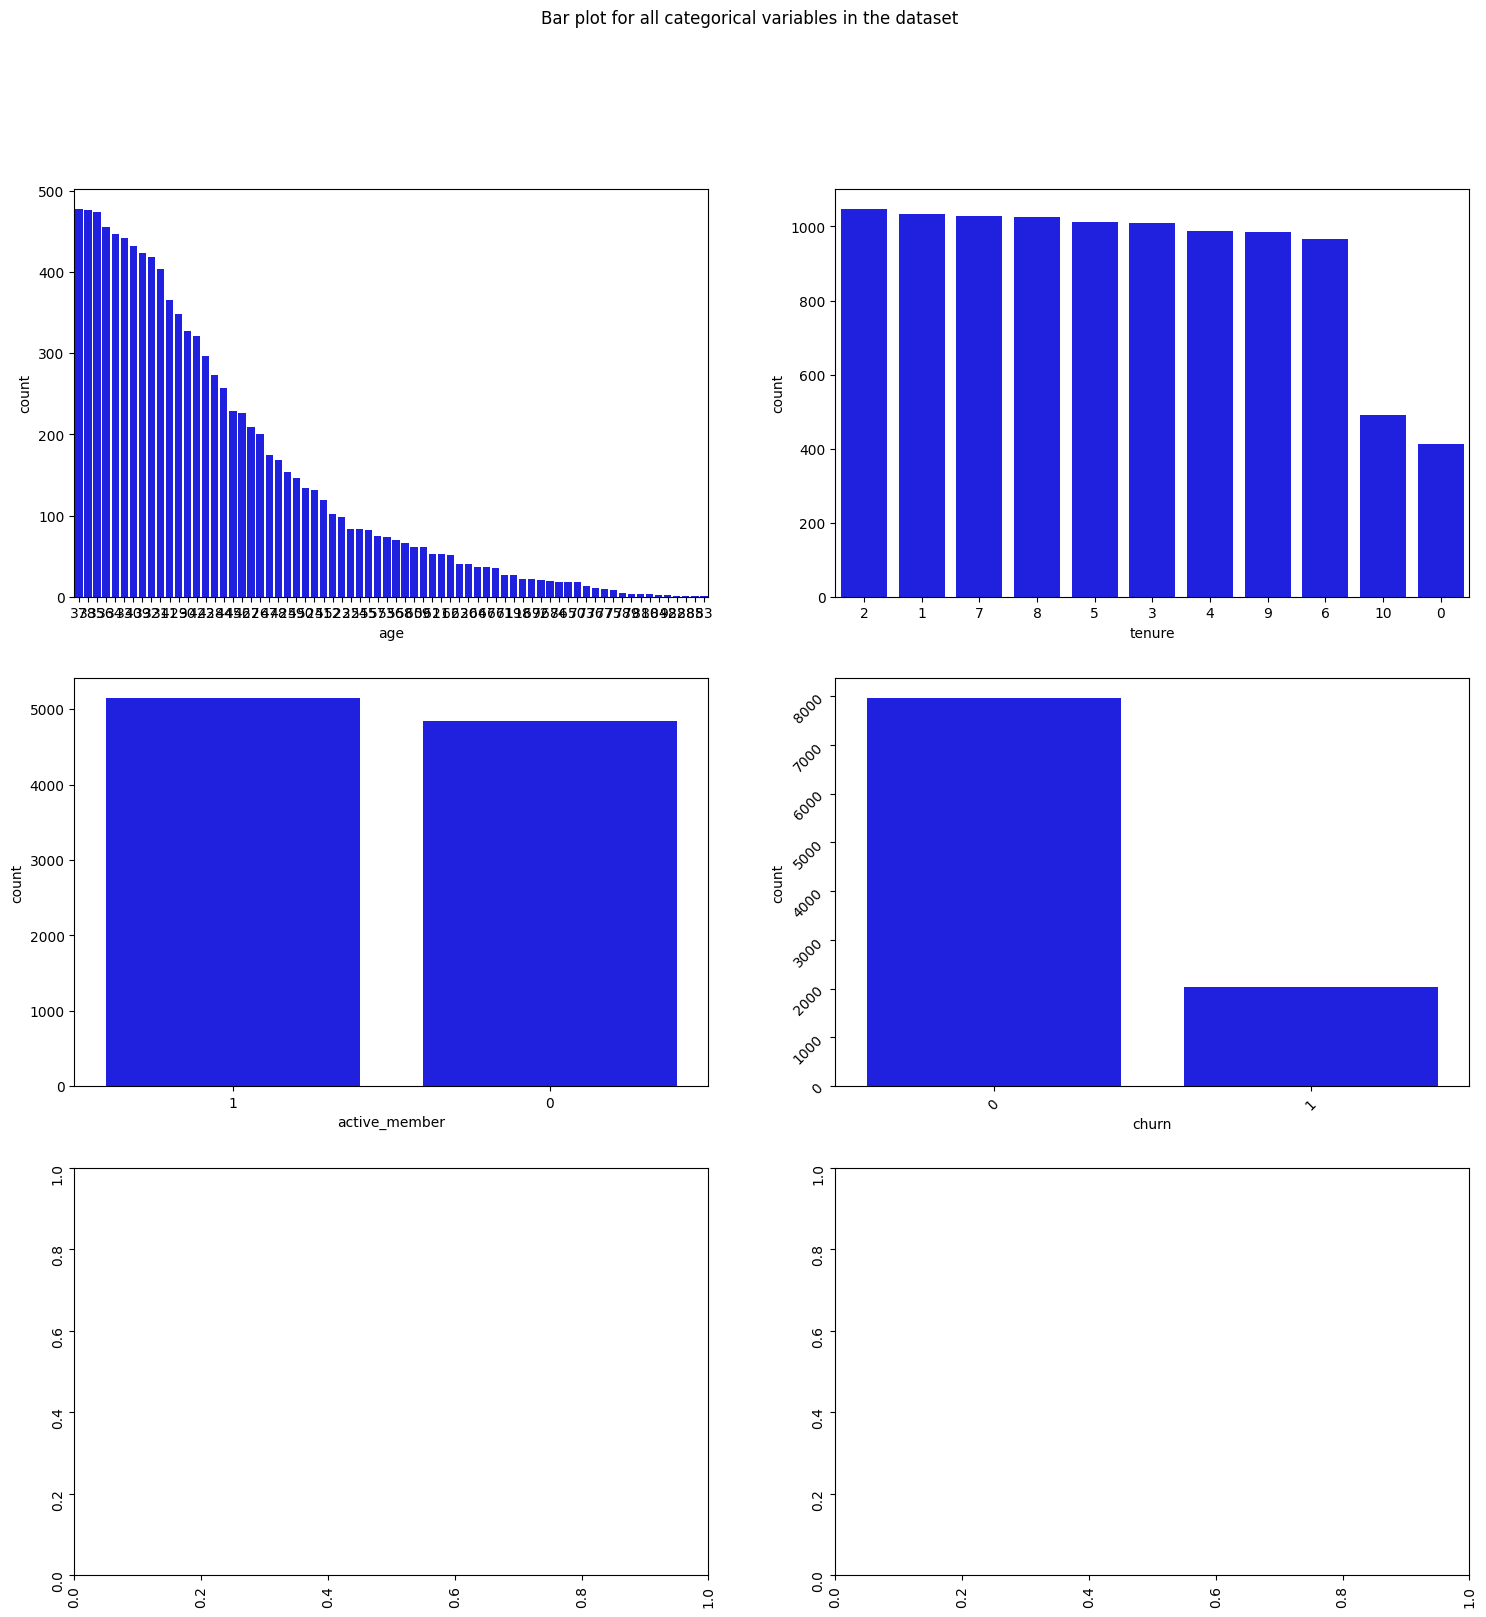

In [56]:
data2 = ds.copy()
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'age', data = data2, color = 'blue',
              order = data['age'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'tenure', data = data2, color = 'blue',
              order = data['tenure'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'active_member', data = data2, color = 'blue',
              order = data['active_member'].head(20).value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'churn', data = data2, color = 'blue',
              order = data['churn'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);